In [34]:
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def exp_val(llambda):
    return -1.0*numpy.log(1-random.random())/llambda


0.5436976520699389

In [7]:
def Donnee(taille,l1,l2,k):
    return numpy.array([exp_val(l1) for i in range(k)]+[exp_val(l2) for j in range(taille-k)])

In [55]:
def log_vrai(data,k):
    n = len(data)
    return -k*np.log(np.mean(data[0:k]))-(n-k)*np.log(np.mean(data[k:n]))

In [56]:
def Estimator_k(data):
    LL =[]
    for k in range(4,len(data)-3):
        LL.append(log_vrai(data,k))
    return int(4+np.argmax(LL))

In [100]:
data = Donnee(1000,1,2,900)
Estimator_k(data)

896

In [108]:
def graphe_modele(data):
    LL = []
    for k in range(4,len(data)-3):
        LL.append(log_vrai(data,k))
    plt.plot(LL)
    k_estim = Estimator_k(data)
    plt.title("$\hat{k}=%d$"%(k_estim))
    plt.show()
    xbark = np.mean(data[:k_estim])
    xbaretk = np.mean(data[k_estim:])
    return 1.0/xbark , 1.0/xbaretk

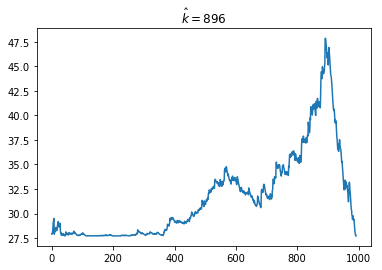

(0.9730845433921284, 2.0045129014662604)

In [109]:
graphe_modele(data)


In [77]:
import numpy 

def erreur(X,Y,k):
    meanX1 = sum(numpy.array([X[i] for i in range(k)]))/k
    meanY1 = sum(numpy.array([Y[i] for i in range(k)]))/k
    meanX2 = sum(numpy.array([X[i] for i in range(k,len(X))]))/(len(X)-k)
    meanY2 = sum(numpy.array([Y[i] for i in range(k,len(X))]))/(len(X)-k)
    
    A1 = sum(numpy.array([(X[i]-meanX1)*(Y[i]-meanY1) for i in range(k)]))/sum(numpy.array([(X[i]-meanX1)*(X[i]-meanX1) for i in range(k)]))
    B1 = meanY1-A1*meanX1
    
    A2 = sum(numpy.array([(X[i]-meanX2)*(Y[i]-meanY2) for i in range(k,len(X))]))/sum(numpy.array([(X[i]-meanX2)*(X[i]-meanX2) for i in range(k,len(X))]))
    B2 = meanY2-A2*meanX2
     
    e1 = sum(numpy.array([(Y[i]-(B1+A1*X[i]))*(Y[i]-(B1+A1*X[i])) for i in range(k)]))
    e2 = sum(numpy.array([(Y[i]-(B2+A2*X[i]))*(Y[i]-(B2+A2*X[i])) for i in range(k,len(X))]))
    return e1+e2

In [78]:
X = numpy.array([4,13,5,2,6,8,1,12,17,20,15,11,3,14,16,10,7,19,18,9])
Y = numpy.array([3.473,11.555,5.714,5.710,6.046,7.650,3.140,10.312,13.353,17.197,13.036,8.264,7.612,11.802,12.551,10.296,10.014,15.472,15.650,9.871])


In [79]:
def Estimator_k(X,Y):
    LL =[]
    for k in range(4,len(X)-3):
        LL.append(erreur(X,Y,k))
    return int(4+np.argmin(LL))

In [80]:
Estimator_k(X,Y)

12

In [130]:
def graphe_modele(X,Y):
    LL = []
    for k_ in range(4,len(X)-3):
        LL.append(erreur(X,Y,k_))
    plt.plot(LL)
    k = Estimator_k(X,Y)
    plt.title("$\hat{k}=%d$"%(k))
    plt.show()
    
    meanX1 = sum(numpy.array([X[i] for i in range(k)]))/k
    meanY1 = sum(numpy.array([Y[i] for i in range(k)]))/k
    meanX2 = sum(numpy.array([X[i] for i in range(k+1,len(X))]))/(len(X)-k)
    meanY2 = sum(numpy.array([Y[i] for i in range(k+1,len(X))]))/(len(X)-k)
    
    A1 = sum(numpy.array([(X[i]-meanX1)*(Y[i]-meanY1) for i in range(k)]))/sum(numpy.array([(X[i]-meanX1)*(X[i]-meanX1) for i in range(k)]))
    B1 = meanY1-A1*meanX1
    
    A2 = sum(numpy.array([(X[i]-meanX2)*(Y[i]-meanY1) for i in range(k,len(X))]))/sum(numpy.array([(X[i]-meanX1)*(X[i]-meanX2)for i in range(k,len(X))]))
    B2 = meanY2-A2*meanX2
    
    return B1,A1,B2,A2

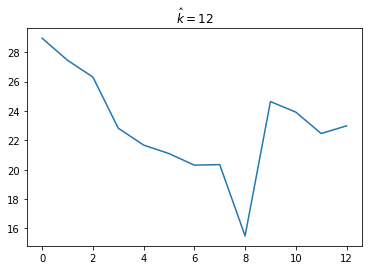

In [131]:
paremetre = graphe_modele(X,Y)
k_opti=Estimator_k(X,Y)
B1 = paremetre[0]
A1 = paremetre[1]
B2 = paremetre[2]
A2 = paremetre[3]

def graphe_model(B1,A1,B2,A2,k):
    X = numpy.array([i for i in range(20)])
    Y1= [B1 + A1*X[i] for i in range(k)]
    Y2= [B2 + A2*X[i] for i in range(k,len(X))]
    Y = Y1+Y2
    plt.scatter(X, Y, alpha=0.6)

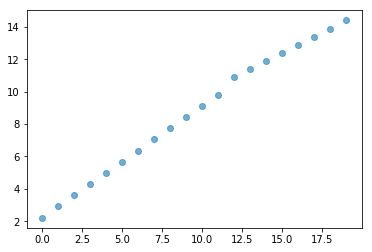

In [129]:
graphe_model(B1,A1,B2,A2,k_opti)

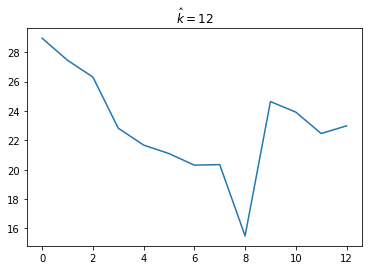

(2.2214744525547445, 0.6911605839416058, 4.889880129589632, 0.5003974082073434)

In [133]:
graphe_modele(X,Y)

13

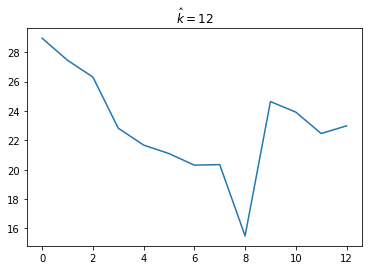

(2.2214744525547445, 0.6911605839416058, 4.889880129589632, 0.5003974082073434)

In [119]:
graphe_modele(X,Y)